# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [34]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

c:\Users\georg\OneDrive\Skrivebord\projects-2023-noobs\projects-2023-noobs-1\inauguralproject\HouseholdSpecializationModel.py:61: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma+1e-8))+par.alpha*HF**((par.sigma-1)/(par.sigma+1e-8)))**(par.sigma/(par.sigma+1e-8-1))


Relative hours = HF/HM = 3.00/5.50= 0.55 for alpha and sigma (0.25, 0.5)
Relative hours = HF/HM = 2.00/6.50= 0.31 for alpha and sigma (0.25, 1.0)
Relative hours = HF/HM = 1.50/7.00= 0.21 for alpha and sigma (0.25, 1.5)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 0.5)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 1.0)
Relative hours = HF/HM = 4.50/4.50= 1.00 for alpha and sigma (0.5, 1.5)
Relative hours = HF/HM = 5.50/3.00= 1.83 for alpha and sigma (0.75, 0.5)
Relative hours = HF/HM = 6.50/2.00= 3.25 for alpha and sigma (0.75, 1.0)
Relative hours = HF/HM = 7.00/1.50= 4.67 for alpha and sigma (0.75, 1.5)


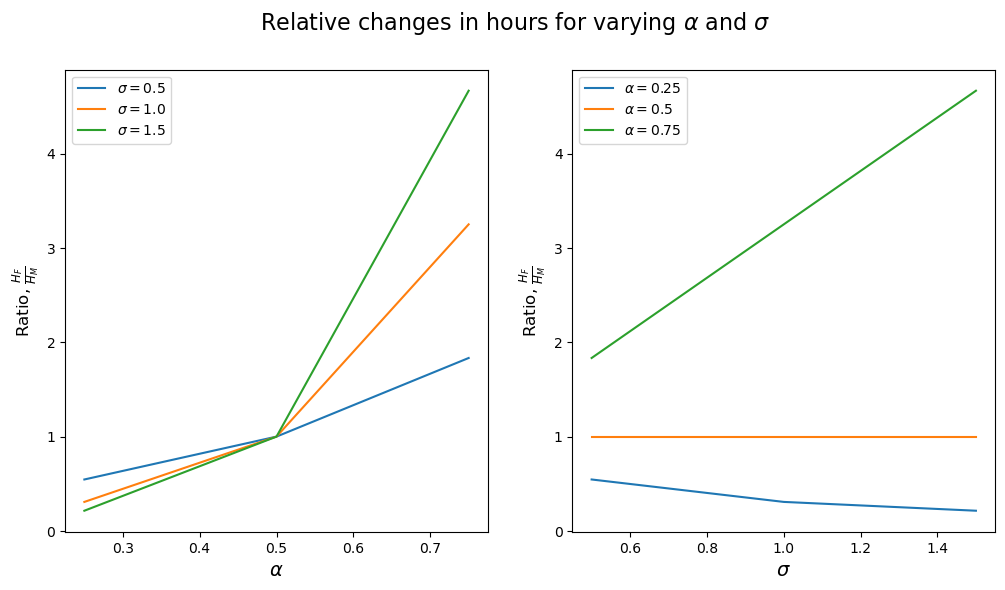

In [35]:
# Create dictionaries
dict_HF = {}
dict_HM = {}
dict_ratio = {}

# Using varying parameters of alpha and sigma
for alpha in [0.25, 0.50, 0.75]:    
    for sigma in [0.5, 1.0, 1.5]:
        # Set new values for alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        dsol = model.solve_discrete()
        
        # store the result
        dict_HF[(alpha, sigma)] = dsol.HF
        dict_HM[(alpha, sigma)] = dsol.HM
        dict_ratio[(alpha, sigma)] = dsol.HF/dsol.HM

        # print results
        print(f'Relative hours = HF/HM = {dsol.HF:.2f}/{dsol.HM:.2f}= {dsol.HF/dsol.HM:.2f} for alpha and sigma {alpha, sigma}')
                       
# We plot the results
# a. create the figure
fig = plt.figure(figsize=(12,6))# figsize is in inches...

# b. left plot
ax_left = fig.add_subplot(1,2,1)
for sigma in [0.5, 1.0, 1.5]:
    y = [dict_ratio[(alpha, sigma)] for alpha in [0.25, 0.50, 0.75]]
    ax_left.plot([0.25, 0.50, 0.75], y, label=rf"$\sigma={sigma}$")
ax_left.set_xlabel(r'$\alpha$',fontsize=14)
ax_left.set_ylabel(rf"Ratio, $\frac{{H_F}}{{H_M}}$",fontsize=12)
ax_left.legend()


# c. right plot
ax_right = fig.add_subplot(1,2,2)
for alpha in [0.25, 0.50, 0.75]:
    y = [dict_ratio[(alpha, sigma)] for sigma in [0.5, 1.0, 1.5]]
    ax_right.plot([0.5, 1.0, 1.5], y, label=rf"$\alpha={alpha}$")
ax_right.set_xlabel(r'$\sigma$',fontsize=14)
ax_right.set_ylabel(rf"Ratio, $\frac{{H_F}}{{H_M}}$",fontsize=12)
ax_right.legend()



plt.close(fig) # (Suppress print to fit slides) 
fig.suptitle(rf"Relative changes in hours for varying $\alpha$ and $\sigma$",fontsize=16)
fig


We find that the ratio is positively correlated with $\alpha$. And the ratio increases in $\sigma$ when $\alpha$ is high, and decreases in $\sigma$ when $\alpha$ is low.


# Question 2

The log optimal relative hours at home is 0.223 for a log relative wage of -0.22, when wF=0.8
The log optimal relative hours at home is 0.000 for a log relative wage of -0.11, when wF=0.9
The log optimal relative hours at home is 0.000 for a log relative wage of 0.00, when wF=1.0
The log optimal relative hours at home is -0.118 for a log relative wage of 0.10, when wF=1.1
The log optimal relative hours at home is -0.223 for a log relative wage of 0.18, when wF=1.2


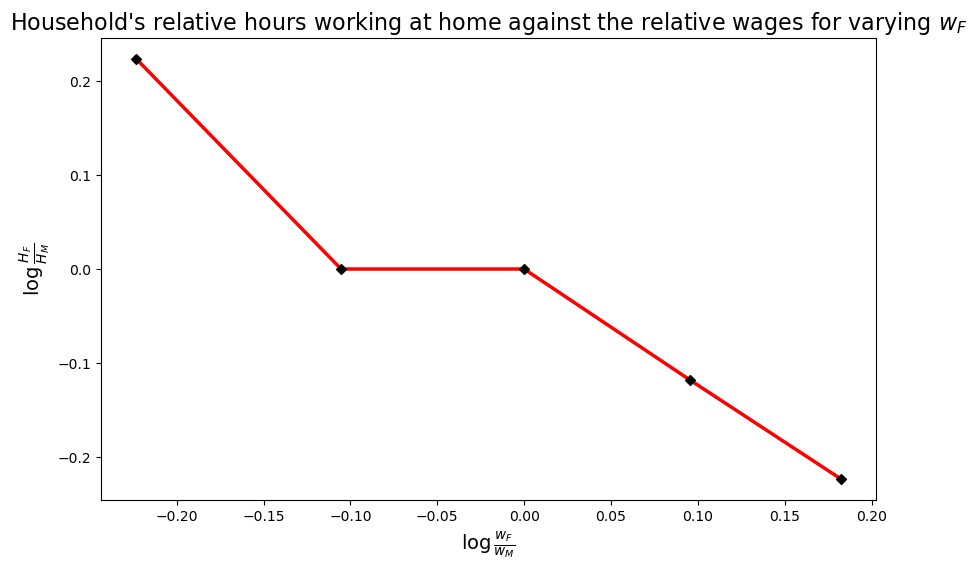

In [36]:
# unpack variables from class
par = model.par
par.alpha = 0.5
par.sigma = 1.0

# set wF equal to the vector already defined in class
wF = model.par.wF_vec

# create a zero dictionary
q2_dict= []

# discrete model with different values of wM.
for wage in wF:

    # set new value for wF
    model.par.wF = wage

    # solve discrete model
    dsol = model.solve_discrete()

    # store results
    store = dsol.HF/dsol.HM
    q2_dict = np.append(q2_dict, store)

    # print results before taking log
    print(rf"The log optimal relative hours at home is {np.log(dsol.HF/dsol.HM):.3f} for a log relative wage of {np.log(wage):.2f}, when wF={wage}")


# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.log(wF), np.log(q2_dict), color='black', marker='D', s=25, zorder=10)
ax.plot(np.log(wF), np.log(q2_dict), color='red', lw=2.5) # wM is normalized to 1 and we can thus take the relative wages as wF
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title(rf"Household's relative hours working at home against the relative wages for varying $w_F$",fontsize=16)
plt.show()
    


We find that when $w_F\rightarrow1.2$, will the relative wages increase, and relative hours working at home decrease. This is because females substitutes going to work for working at home as their wages increases. 
For $w_F=1$ will men and females earn the same wage and therefore work the same amount at home.

# Question 3

Explain your code and procedure

The log optimal relative hours at home is 4.222 for a log relative wage of -0.22, when wF=0.8
The log optimal relative hours at home is 4.105 for a log relative wage of -0.11, when wF=0.9
The log optimal relative hours at home is 3.999 for a log relative wage of 0.00, when wF=1.0
The log optimal relative hours at home is 3.904 for a log relative wage of 0.10, when wF=1.1
The log optimal relative hours at home is 3.817 for a log relative wage of 0.18, when wF=1.2


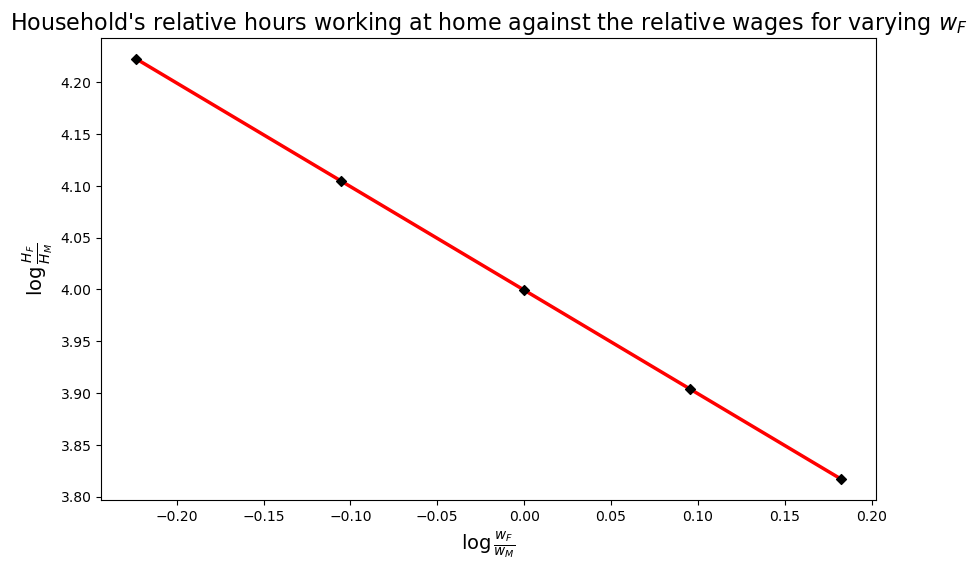

In [51]:
# create a zero dictionary
q3_dict= []

# discrete model with different values of wM.
for wage in wF:

    # set new value for wF
    model.par.wF = wage

    # solve discrete model
    csol = model.solve()

    # store results
    store = csol.HF/csol.HM
    q3_dict = np.append(q3_dict, store)

    # print results before taking log
    print(rf"The log optimal relative hours at home is {np.log(csol.HF/csol.HM):.3f} for a log relative wage of {np.log(wage):.2f}, when wF={wage}")

# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.log(wF), np.log(q3_dict), color='black', marker='D', s=25, zorder=10)
ax.plot(np.log(wF), np.log(q3_dict), color='red', lw=2.5) # wM is normalized to 1 and we can thus take the relative wages as wF
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title(rf"Household's relative hours working at home against the relative wages for varying $w_F$",fontsize=16)
plt.show()

We find that when the variables are constraint in a continously interval $[0,24]$ will we not get the same kink as in question 2.

# Question 4

In [38]:
def minimize_function(x):
    par.alpha = x[0]
    par.sigma = x[1]

    # solve models
    model.solve_wF_vec()
    model.run_regression()

    # set beta hat values
    beta0_hat = model.sol.beta0
    beta1_hat = model.sol.beta1

    # set minimize function
    min = (par.beta0_target - beta0_hat)**2 + (par.beta1_target - beta1_hat)**2

    return min

# set bounds
bounds = ((0.25, 1), (0.05, 1.5))

# call solver
sol = optimize.minimize(minimize_function, [par.alpha, par.sigma], method="Nelder-Mead", bounds=bounds, tol=1e-8)

print(f'alpha = {sol.x[0]:.3f} and sigma = {sol.x[1]:.3f} for the target values (beta0, beta1): ({par.beta0_target}, {par.beta1_target})')

c:\Users\georg\OneDrive\Skrivebord\projects-2023-noobs\projects-2023-noobs-1\inauguralproject\HouseholdSpecializationModel.py:61: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma+1e-8))+par.alpha*HF**((par.sigma-1)/(par.sigma+1e-8)))**(par.sigma/(par.sigma+1e-8-1))


Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
alpha = 0.982 and sigma = 0.100 for the target values (beta0, beta1): (0.4, -0.1)


We find that the function $\left(\beta_0-\hat{\beta_0}\right)^2+\left(\beta_1-\hat{\beta_1}\right)^2$ is minimized for $\alpha=0.982$ and $\sigma=0.1$

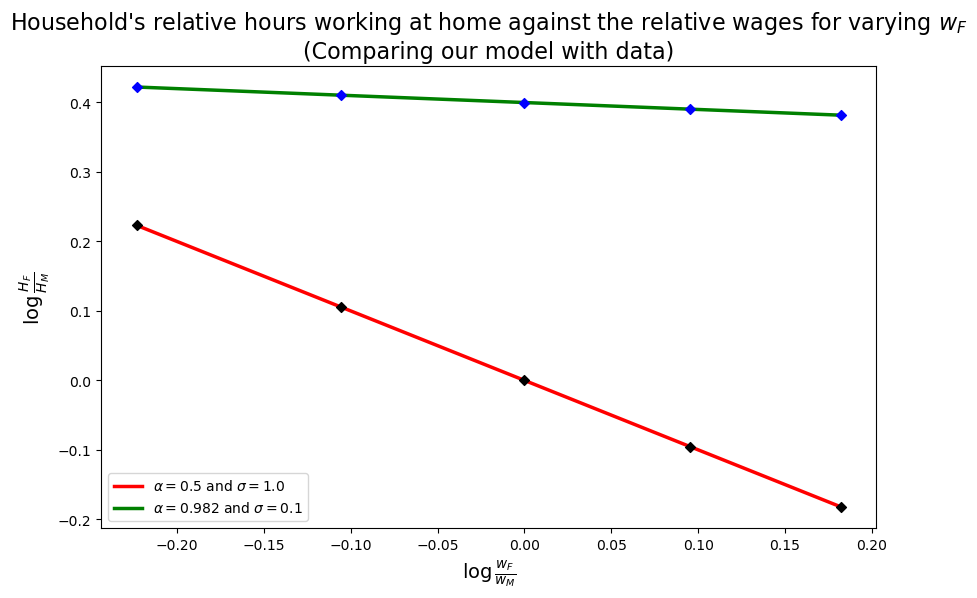

In [76]:
import HouseholdSpecializationModel
model = HouseholdSpecializationModel.HouseholdSpecializationModelClass()
# create a zero dictionary
q3_dict= []

# discrete model with different values of wM.
for wage in wF:

    # set new value for wF
    model.par.wF = wage

    # solve discrete model
    csol = model.solve()

    # store results
    store = csol.HF/csol.HM
    q3_dict = np.append(q3_dict, store)

import House2
model = House2.Household2()
# create a zero dictionary
q4_dict= []

# discrete model with different values of wM.
for wage in wF:

    # set new value for wF
    model.par.wF = wage

    # solve discrete model
    csol = model.solve()

    # store results
    store = csol.HF/csol.HM
    q4_dict = np.append(q4_dict, store)

# create plot
fig = plt.figure(figsize=(10,6))# figsize is in inches

# plot the log values
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.log(wF), np.log(q3_dict), color='black', marker='D', s=25, zorder=10)
ax.plot(np.log(wF), np.log(q3_dict), color='red', lw=2.5, label = rf"$\alpha=0.5$ and $\sigma=1.0$")
ax.scatter(np.log(wF), np.log(q4_dict), color='blue', marker='D', s=25, zorder=10)
ax.plot(np.log(wF), np.log(q4_dict), color='green', lw=2.5, label = rf"$\alpha=0.982$ and $\sigma=0.1$") # wM is normalized to 1 and we can thus take the relative wages as wF
ax.set_xlabel(rf"$\log \frac{{w_F}}{{w_M}}$",fontsize=14)
ax.set_ylabel(rf"$\log \frac{{H_F}}{{H_M}}$",fontsize=14)
ax.set_title("Household's relative hours working at home against the relative wages for varying $w_F$ \n(Comparing our model with data)", fontsize=16)
plt.legend()
plt.show()

Intuition por favor:

Noget med at kvinder ikke substituerer lige så meget pga deres elasticitet